In [3]:
! pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.4 MB/s eta 0:00:00


Trial 30 Complete [00h 00m 55s]
val_loss: 0.001917644520290196

Best val_loss So Far: 0.001917644520290196
Total elapsed time: 00h 28m 58s

--- Kết thúc Tinh chỉnh Siêu tham số ---

Quá trình tìm kiếm siêu tham số đã hoàn tất.
Số lớp LSTM tối ưu là 1.
Tốc độ học tối ưu cho optimizer là 0.00014298838601286396.
Số units tối ưu cho lớp LSTM 1: 96
Tỷ lệ dropout tối ưu cho lớp LSTM 1: 0.5


--- Huấn luyện Mô hình Tốt nhất ---
Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 5.7338e-04 - val_loss: 0.0464 - learning_rate: 1.4299e-04
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0027 - val_loss: 0.0123 - learning_rate: 1.4299e-04
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 9.7013e-04 - val_loss: 0.0024 - learning_rate: 1.4299e-04
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 1.7856e-04 - val_loss: 0.0023 - learning_rate: 1.4299e-04
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.2926e-04 - val_loss: 0.0023 - learning_rate: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 96)             │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,309 (477.77 KB)

 Trainable params: 40,769 (159.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,540 (318.52 KB)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

--- Đánh giá Mô hình (Mô hình LSTM Tốt nhất) ---
RMSE tập huấn luyện: $561.59
MAE tập huấn luyện: $264.30
R-squared tập huấn luyện: 0.9780
MAPE tập huấn luyện: 17.61%

RMSE tập kiểm tra: $2834.17
MAE tập kiểm tra: $1794.14
R-squared tập kiểm tra: 0.9738
MAPE tập kiểm tra: 7.82%


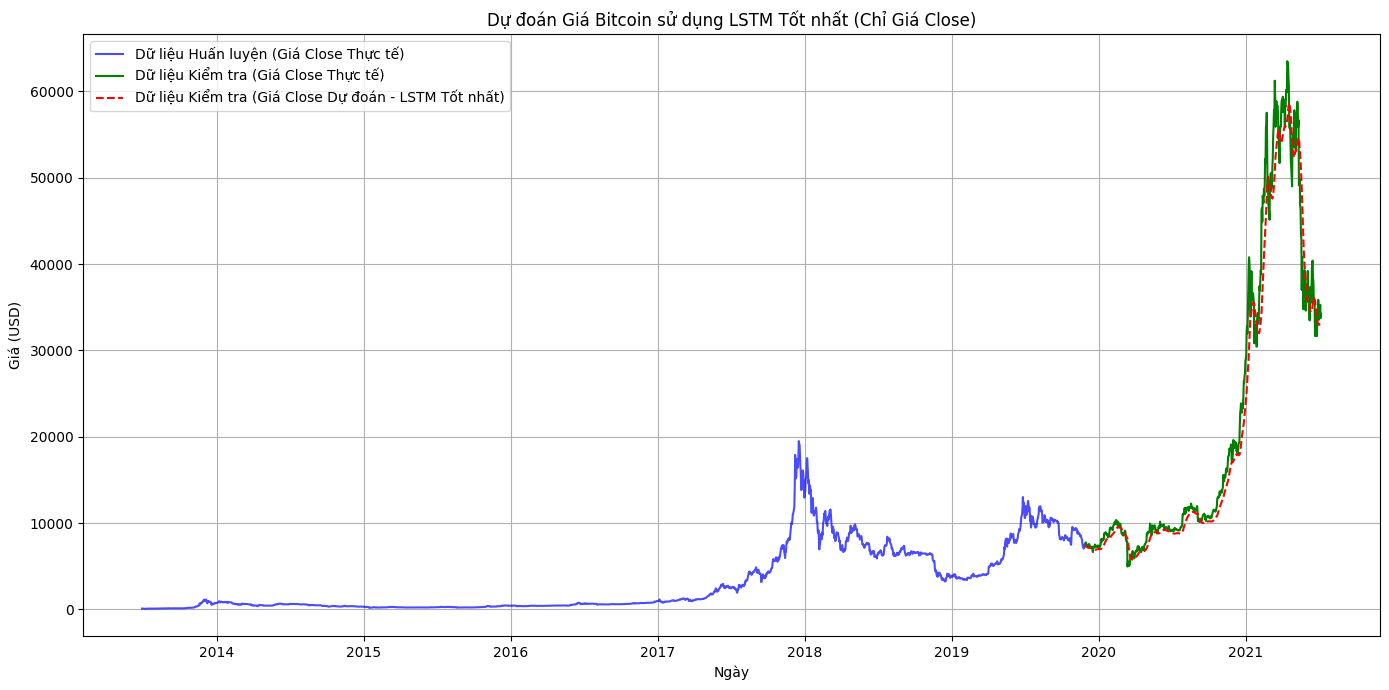

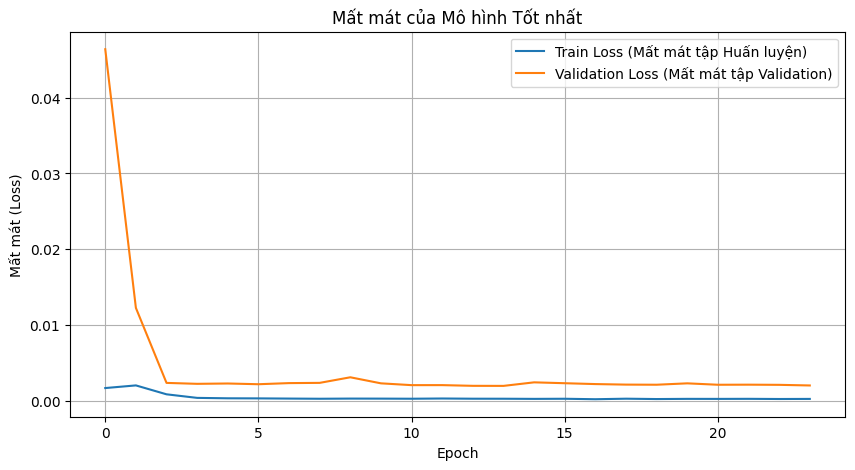

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

--- Dự báo Ngày Tiếp theo (1 bước tới sử dụng LSTM Tốt nhất - Chỉ Giá Close) ---
Giá Close thực tế cuối cùng vào 2021-07-06: $34235.19

Giá Close dự đoán cho 2021-07-07: $32901.66
Results summary
Results in keras_tuner_dir_vn/bitcoin_lstm_tuning_vn
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0029 summary
Hyperparameters:
num_lstm_layers: 1
units_lstm_1: 96
dropout_lstm_1: 0.5
units_dense: 32
dropout_dense: 0.2
lr: 0.00014298838601286396
units_lstm_2: 128
dropout_lstm_2: 0.5
units_lstm_3: 64
dropout_lstm_3: 0.30000000000000004
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.001917644520290196

Trial 0026 summary
Hyperparameters:
num_lstm_layers: 1
units_lstm_1: 96
dropout_lstm_1: 0.5
units_dense: 16
dropout_dense: 0.2
lr: 0.00018398436193518779
units_lstm_2: 32
dropout_lstm_2: 0.1
units_lstm_3: 96
dropout_lstm_3: 0.1
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam # Import Adam để điều chỉnh tốc độ học

import keras_tuner as kt # Import KerasTuner

# Để đảm bảo kết quả có thể tái tạo
np.random.seed(42)
tf.random.set_seed(42)

# 1. Tải dữ liệu
try:
    df = pd.read_csv('/content/coin_Bitcoin.csv') # Đảm bảo file này tồn tại
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file coin_Bitcoin.csv. Vui lòng đảm bảo file nằm trong thư mục hiện tại hoặc cung cấp đường dẫn chính xác.")
    # Tạo DataFrame mẫu nếu file không tồn tại để code có thể chạy
    date_rng = pd.date_range(start='2017-01-01', end='2021-07-31', freq='D')
    data = {
        'Date': date_rng,
        'Close': np.random.rand(len(date_rng)) * 50000 + 5000
        # Chỉ cần 'Close' cho DataFrame mẫu
    }
    df = pd.DataFrame(data)
    print("Đang sử dụng dữ liệu mẫu (chỉ có cột 'Close') vì không tìm thấy coin_Bitcoin.csv.")

# 2. Tiền xử lý
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True) # Đảm bảo dữ liệu được sắp xếp theo thời gian
df.set_index('Date', inplace=True)

# Chỉ sử dụng cột 'Close' làm đặc trưng
df_features = df[['Close']].copy()
df_features.fillna(method='ffill', inplace=True) # Điền các giá trị NaN bằng giá trị trước đó

if df_features.empty:
    print("DataFrame trống sau khi xử lý ban đầu.")
    exit()

# 3. Chuẩn hóa dữ liệu
# Vì chỉ có một đặc trưng ('Close') và đó cũng là mục tiêu, chúng ta chỉ cần một scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_features)

# 4. Tạo chuỗi dữ liệu (Sequences)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)]) # Dãy các giá trị 'Close' quá khứ
        y.append(data[i + sequence_length])    # Giá trị 'Close' tiếp theo để dự đoán
    return np.array(X), np.array(y)

sequence_length = 60 # Độ dài chuỗi này sẽ được giữ cố định cho ví dụ KerasTuner để đơn giản hóa
# num_features bây giờ là 1 (chỉ có 'Close')
num_features = scaled_data.shape[1] # Sẽ là 1

X_seq, y_seq = create_sequences(scaled_data, sequence_length)

if X_seq.shape[0] == 0:
    print(f"Không đủ dữ liệu để tạo chuỗi với độ dài {sequence_length}. Cần ít nhất {sequence_length + 1} điểm dữ liệu.")
    exit()

print(f"Kích thước của X_seq: {X_seq.shape}") # Dự kiến: (số mẫu, sequence_length, 1)
print(f"Kích thước của y_seq: {y_seq.shape}") # Dự kiến: (số mẫu, 1)

# 5. Chia dữ liệu theo thứ tự thời gian
split_ratio = 0.8
split_index = int(len(X_seq) * split_ratio)

X_train, y_train = X_seq[:split_index], y_seq[:split_index]
X_test, y_test = X_seq[split_index:], y_seq[split_index:]

print(f"Kích thước tập huấn luyện: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Kích thước tập kiểm tra: X_test {X_test.shape}, y_test {y_test.shape}")

if len(X_train) == 0 or len(X_test) == 0:
    print("Tập huấn luyện hoặc tập kiểm tra trống sau khi tạo chuỗi. Điều chỉnh tỷ lệ chia hoặc kiểm tra dữ liệu.")
    exit()

# 6. Tinh chỉnh Siêu tham số với KerasTuner

def build_model_for_tuner(hp): # hp là đối tượng HyperParameters của KerasTuner
    model = Sequential()

    # Tinh chỉnh số lượng lớp LSTM
    num_lstm_layers = hp.Int('num_lstm_layers', 1, 3) # Tìm số lớp LSTM từ 1 đến 3

    # Tinh chỉnh units và dropout cho lớp LSTM đầu tiên
    model.add(LSTM(units=hp.Int('units_lstm_1', min_value=32, max_value=128, step=32), # Số units từ 32 đến 128, bước nhảy 32
                   return_sequences=True if num_lstm_layers > 1 else False, # Chỉ return_sequences nếu có lớp LSTM khác theo sau
                   input_shape=(sequence_length, num_features)))
    model.add(Dropout(hp.Float('dropout_lstm_1', min_value=0.1, max_value=0.5, step=0.1))) # Tỷ lệ dropout từ 0.1 đến 0.5

    # Thêm các lớp LSTM khác nếu num_lstm_layers > 1
    for i in range(1, num_lstm_layers):
        model.add(LSTM(units=hp.Int(f'units_lstm_{i+1}', min_value=32, max_value=128, step=32),
                       return_sequences=True if i < num_lstm_layers - 1 else False)) # Lớp LSTM cuối cùng không return_sequences
        model.add(Dropout(hp.Float(f'dropout_lstm_{i+1}', min_value=0.1, max_value=0.5, step=0.1)))

    # Tinh chỉnh lớp Dense trước lớp output
    model.add(Dense(units=hp.Int('units_dense', min_value=16, max_value=64, step=16), # Số units từ 16 đến 64
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_dense', min_value=0.1, max_value=0.3, step=0.1))) # Tỷ lệ dropout

    model.add(Dense(units=1)) # Lớp output, dự đoán 1 giá trị

    # Tinh chỉnh tốc độ học (learning rate) cho optimizer Adam
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log") # Tốc độ học trong khoảng logarit
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='mean_squared_error') # Hàm mất mát
    return model

# Khởi tạo tuner
# Sử dụng Hyperband để hiệu quả. Để chạy nhanh, RandomSearch với ít trials hơn cũng là một lựa chọn.
tuner = kt.Hyperband(
    build_model_for_tuner, # Hàm xây dựng mô hình
    objective='val_loss',  # Mục tiêu là giảm thiểu val_loss (loss trên tập validation)
    max_epochs=20,         # Số epochs tối đa cho mỗi cấu hình mô hình trong quá trình tinh chỉnh
    factor=3,              # Hệ số giảm cho Hyperband (số lượng cấu hình bị loại bỏ mỗi vòng)
    directory='keras_tuner_dir_vn', # Thư mục lưu kết quả của tuner
    project_name='bitcoin_lstm_tuning_vn' # Tên dự án
)

# Định nghĩa callback để dừng sớm việc huấn luyện nếu val_loss không cải thiện
# Callback này dành cho mỗi "trial" (lần thử nghiệm cấu hình) trong quá trình tìm kiếm của tuner
tuner_early_stopping = EarlyStopping(monitor='val_loss', patience=5)

print("\n--- Bắt đầu Tinh chỉnh Siêu tham số ---")
# Giảm epochs cho quá trình tìm kiếm để chạy nhanh hơn cho ví dụ này.
# Trong kịch bản thực tế, bạn sẽ sử dụng nhiều epochs và trials hơn.
# Tham số `epochs` ở đây là số epochs để huấn luyện mỗi cấu hình mô hình.
# `max_epochs` trong constructor của Hyperband là số epochs tối đa có thể cho các mô hình tốt nhất.
tuner.search(X_train, y_train,
             epochs=30, # Số epochs để huấn luyện mỗi mô hình trong quá trình tìm kiếm
             validation_data=(X_test, y_test),
             callbacks=[tuner_early_stopping],
             batch_size=32, # Cũng có thể được tinh chỉnh: hp.Choice('batch_size', [32, 64]) trong build_model
             shuffle=False) # Không xáo trộn dữ liệu chuỗi thời gian

print("\n--- Kết thúc Tinh chỉnh Siêu tham số ---")

# Lấy các siêu tham số tối ưu nhất
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Quá trình tìm kiếm siêu tham số đã hoàn tất.
Số lớp LSTM tối ưu là {best_hps.get('num_lstm_layers')}.
Tốc độ học tối ưu cho optimizer là {best_hps.get('lr')}.
Số units tối ưu cho lớp LSTM 1: {best_hps.get('units_lstm_1')}
Tỷ lệ dropout tối ưu cho lớp LSTM 1: {best_hps.get('dropout_lstm_1')}
""")
# Bạn có thể in thêm các siêu tham số tối ưu khác tương tự

# Xây dựng mô hình với các siêu tham số tối ưu
best_model = tuner.hypermodel.build(best_hps)
# Hoặc, bạn có thể lấy mô hình tốt nhất trực tiếp nếu nó được tuner lưu lại:
# best_model = tuner.get_best_models(num_models=1)[0]

# Huấn luyện lại mô hình tốt nhất với nhiều epochs hơn trên toàn bộ dữ liệu huấn luyện
print("\n--- Huấn luyện Mô hình Tốt nhất ---")
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = best_model.fit(
    X_train, y_train,
    epochs=100, # Huấn luyện nhiều epochs hơn
    batch_size=32, # Hoặc sử dụng best_hps.get('batch_size') nếu đã tinh chỉnh
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    shuffle=False
)
best_model.summary() # Hiển thị cấu trúc của mô hình tốt nhất

# 8. Đánh giá Mô hình Tốt nhất
y_pred_scaled_train = best_model.predict(X_train)
y_pred_scaled_test = best_model.predict(X_test)

# Sử dụng scaler đã fit trên df_features['Close'] để inverse_transform
y_pred_train = scaler.inverse_transform(y_pred_scaled_train)
y_train_orig = scaler.inverse_transform(y_train)

y_pred_test = scaler.inverse_transform(y_pred_scaled_test)
y_test_orig = scaler.inverse_transform(y_test)

print("\n--- Đánh giá Mô hình (Mô hình LSTM Tốt nhất) ---")
rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
mae_train = mean_absolute_error(y_train_orig, y_pred_train)
r2_train = r2_score(y_train_orig, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train_orig, y_pred_train) * 100

print(f"RMSE tập huấn luyện: ${rmse_train:.2f}")
print(f"MAE tập huấn luyện: ${mae_train:.2f}")
print(f"R-squared tập huấn luyện: {r2_train:.4f}")
print(f"MAPE tập huấn luyện: {mape_train:.2f}%")

rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_test))
mae_test = mean_absolute_error(y_test_orig, y_pred_test)
r2_test = r2_score(y_test_orig, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test_orig, y_pred_test) * 100
print(f"\nRMSE tập kiểm tra: ${rmse_test:.2f}")
print(f"MAE tập kiểm tra: ${mae_test:.2f}")
print(f"R-squared tập kiểm tra: {r2_test:.4f}")
print(f"MAPE tập kiểm tra: {mape_test:.2f}%")

# 9. Trực quan hóa dự đoán
# Lấy index ngày tháng cho phần train và test để vẽ đồ thị
train_dates_index = df_features.index[sequence_length : split_index + sequence_length]
test_dates_index = df_features.index[split_index + sequence_length : split_index + sequence_length + len(y_test_orig)]


plt.figure(figsize=(14, 7))
# Vẽ dữ liệu training (Thực tế)
if len(y_train_orig) > 0 and len(train_dates_index) == len(y_train_orig):
    plt.plot(train_dates_index, y_train_orig, label='Dữ liệu Huấn luyện (Giá Close Thực tế)', color='blue', alpha=0.7)
else:
    print("Cảnh báo: Không thể vẽ dữ liệu huấn luyện do không khớp độ dài hoặc dữ liệu trống.")

# Vẽ dữ liệu test (Thực tế)
if len(y_test_orig) > 0 and len(test_dates_index) == len(y_test_orig):
    plt.plot(test_dates_index, y_test_orig, label='Dữ liệu Kiểm tra (Giá Close Thực tế)', color='green')
else:
    print("Cảnh báo: Không thể vẽ dữ liệu kiểm tra thực tế do không khớp độ dài hoặc dữ liệu trống.")

# Vẽ dữ liệu test (Dự đoán)
if len(y_pred_test) > 0 and len(test_dates_index) == len(y_pred_test):
    plt.plot(test_dates_index, y_pred_test, label='Dữ liệu Kiểm tra (Giá Close Dự đoán - LSTM Tốt nhất)', color='red', linestyle='--')
else:
    print("Cảnh báo: Không thể vẽ dữ liệu kiểm tra dự đoán do không khớp độ dài hoặc dữ liệu trống.")

plt.title('Dự đoán Giá Bitcoin sử dụng LSTM Tốt nhất (Chỉ Giá Close)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ đồ thị loss của quá trình huấn luyện & validation cho mô hình tốt nhất
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (Mất mát tập Huấn luyện)')
plt.plot(history.history['val_loss'], label='Validation Loss (Mất mát tập Validation)')
plt.title('Mất mát của Mô hình Tốt nhất')
plt.ylabel('Mất mát (Loss)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# 10. Thực hiện dự báo 1 bước tới với mô hình tốt nhất
# Lấy sequence_length ngày cuối cùng từ scaled_data
last_sequence_scaled = scaled_data[-sequence_length:]
# Reshape cho phù hợp với input của model: (1, sequence_length, num_features)
last_sequence_reshaped = last_sequence_scaled.reshape(1, sequence_length, num_features)

next_day_pred_scaled = best_model.predict(last_sequence_reshaped)
next_day_prediction = scaler.inverse_transform(next_day_pred_scaled)

last_actual_date = df_features.index[-1]
next_prediction_date = last_actual_date + pd.Timedelta(days=1)

print(f"\n--- Dự báo Ngày Tiếp theo (1 bước tới sử dụng LSTM Tốt nhất - Chỉ Giá Close) ---")
print(f"Giá Close thực tế cuối cùng vào {last_actual_date.date()}: ${df_features['Close'].iloc[-1]:.2f}")
print(f"\nGiá Close dự đoán cho {next_prediction_date.date()}: ${next_day_prediction[0,0]:.2f}")

# Bạn cũng có thể xem tóm tắt quá trình tìm kiếm của tuner
tuner.results_summary()